In [1]:
import pandas as pd
import json 
import openpyxl
from sklearn.datasets import load_iris, load_boston
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [2]:
df_laliga_2019y20 = pd.read_csv('espana-master/2010s/2019-20/es.1.csv')
new = df_laliga_2019y20['FT'].str.split('-',n=1,expand=True)
df_laliga_2019y20['GolesLocal']=new[0]
df_laliga_2019y20['GolesVisitante']=new[1]
df_laliga_2019y20

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante
0,1,Fri Aug 16 2019,Athletic Club Bilbao,1-0,FC Barcelona,1,0
1,1,Sat Aug 17 2019,RC Celta Vigo,1-3,Real Madrid,1,3
2,1,Sat Aug 17 2019,Valencia CF,1-1,Real Sociedad,1,1
3,1,Sat Aug 17 2019,RCD Mallorca,2-1,SD Eibar,2,1
4,1,Sat Aug 17 2019,CD Leganés,0-1,CA Osasuna,0,1
...,...,...,...,...,...,...,...
375,38,Sun Jul 19 2020,Atlético Madrid,1-1,Real Sociedad,1,1
376,38,Sun Jul 19 2020,CD Leganés,2-2,Real Madrid,2,2
377,38,Sun Jul 19 2020,Levante UD,1-0,Getafe CF,1,0
378,38,Sun Jul 19 2020,CA Osasuna,2-2,RCD Mallorca,2,2


In [3]:
df_laliga_2019y20['GolesLocal']=pd.to_numeric(df_laliga_2019y20['GolesLocal'], downcast="float")
df_laliga_2019y20['GolesVisitante']=pd.to_numeric(df_laliga_2019y20['GolesVisitante'], downcast="float")
df_laliga_2019y20['TotalGolesPartido'] = df_laliga_2019y20['GolesLocal']+df_laliga_2019y20['GolesVisitante']
df_laliga_2019y20

,Round,Date,Team 1,FT,Team 2,GolesLocal,GolesVisitante,TotalGolesPartido
0,1,Fri Aug 16 2019,Athletic Club Bilbao,1-0,FC Barcelona,1.0,0.0,1.0
1,1,Sat Aug 17 2019,RC Celta Vigo,1-3,Real Madrid,1.0,3.0,4.0
2,1,Sat Aug 17 2019,Valencia CF,1-1,Real Sociedad,1.0,1.0,2.0
3,1,Sat Aug 17 2019,RCD Mallorca,2-1,SD Eibar,2.0,1.0,3.0
4,1,Sat Aug 17 2019,CD Leganés,0-1,CA Osasuna,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
375,38,Sun Jul 19 2020,Atlético Madrid,1-1,Real Sociedad,1.0,1.0,2.0
376,38,Sun Jul 19 2020,CD Leganés,2-2,Real Madrid,2.0,2.0,4.0
377,38,Sun Jul 19 2020,Levante UD,1-0,Getafe CF,1.0,0.0,1.0
378,38,Sun Jul 19 2020,CA Osasuna,2-2,RCD Mallorca,2.0,2.0,4.0


In [5]:
df_laliga_2019y20['TotalGolesPartido'].describe()

count    380.000000
mean       2.478947
std        1.550242
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: TotalGolesPartido, dtype: float64

In [6]:
df_laliga_2019y20['TotalGolesPartido'].sum()

942.0

In [7]:
RealMadridL_8 = df_laliga_2019y20.loc[df_laliga_2019y20['Team 1'] == 'Real Madrid', ['GolesLocal']]
RealMadridL_8.reset_index(inplace=True)

RealMadridL_8

,index,GolesLocal
0,13,1.0
1,31,3.0
2,56,2.0
3,72,4.0
4,105,5.0
5,112,0.0
6,133,3.0
7,150,2.0
8,179,0.0
9,192,2.0


In [9]:
RealMadridV_8 = df_laliga_2019y20.loc[df_laliga_2019y20['Team 2'] == 'Real Madrid', ['GolesVisitante']]
RealMadridV_8.reset_index(inplace=True)

RealMadridV_8

,index,GolesVisitante
0,1,3.0
1,29,2.0
2,49,1.0
3,64,0.0
4,84,0.0
5,122,4.0
6,140,2.0
7,168,1.0
8,169,0.0
9,183,3.0


In [10]:
Madrid_Tot_8=pd.merge(RealMadridL_8, RealMadridV_8, left_index=True, right_index=True)
Madrid_Tot_8

,index_x,GolesLocal,index_y,GolesVisitante
0,13,1.0,1,3.0
1,31,3.0,29,2.0
2,56,2.0,49,1.0
3,72,4.0,64,0.0
4,105,5.0,84,0.0
5,112,0.0,122,4.0
6,133,3.0,140,2.0
7,150,2.0,168,1.0
8,179,0.0,169,0.0
9,192,2.0,183,3.0


In [11]:
Madrid_Tot_8['GolesTotales']=Madrid_Tot_8['GolesLocal']+Madrid_Tot_8['GolesVisitante']
Madrid_Tot_8

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,13,1.0,1,3.0,4.0
1,31,3.0,29,2.0,5.0
2,56,2.0,49,1.0,3.0
3,72,4.0,64,0.0,4.0
4,105,5.0,84,0.0,5.0
5,112,0.0,122,4.0,4.0
6,133,3.0,140,2.0,5.0
7,150,2.0,168,1.0,3.0
8,179,0.0,169,0.0,0.0
9,192,2.0,183,3.0,5.0


In [12]:
Madrid_Tot_8['GolesLocal'].describe()

count    19.000000
mean      2.105263
std       1.242522
min       0.000000
25%       1.500000
50%       2.000000
75%       3.000000
max       5.000000
Name: GolesLocal, dtype: float64

In [13]:
Madrid_Tot_8['GolesLocal'].sum()

40.0

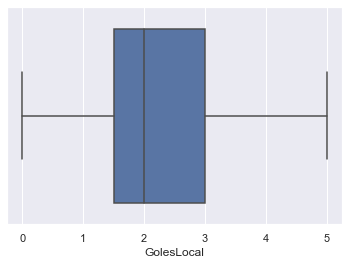

In [14]:
sns.boxplot(x=Madrid_Tot_8['GolesLocal'])
plt.show()

In [15]:
Madrid_Tot_8['GolesVisitante'].describe()

count    19.000000
mean      1.578947
std       1.261207
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: GolesVisitante, dtype: float64

In [16]:
Madrid_Tot_8['GolesVisitante'].sum()

30.0

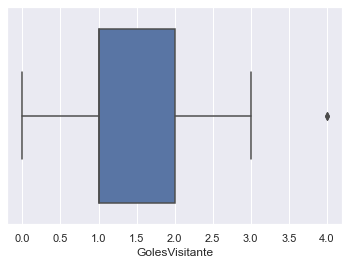

In [17]:
sns.boxplot(x=Madrid_Tot_8['GolesVisitante'])
plt.show()

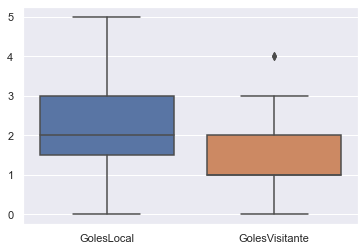

In [18]:
sns.boxplot(data=Madrid_Tot_8.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


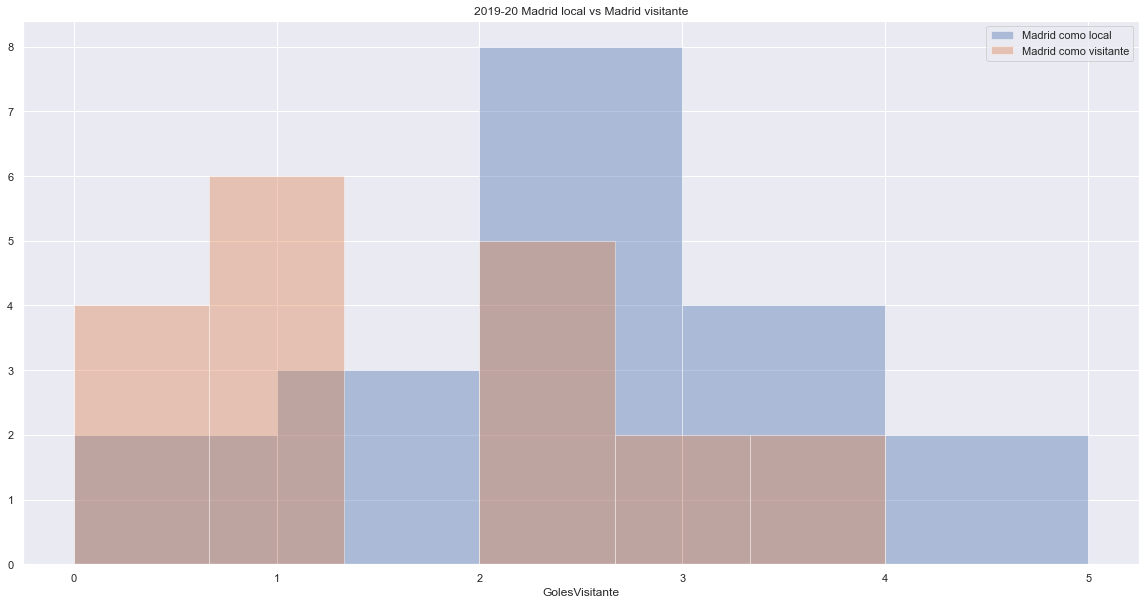

In [19]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_8['GolesLocal'],kde=False, label='Madrid como local')
sns.distplot(Madrid_Tot_8['GolesVisitante'],kde=False, label='Madrid como visitante')
plt.title("2019-20 Madrid local vs Madrid visitante")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2019-20 Madrid local vs Madrid visitante')

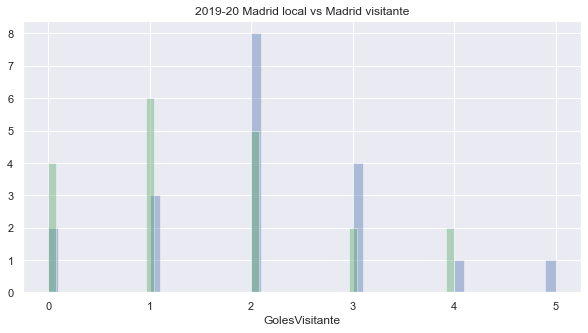

In [20]:
plt.figure(figsize=(10,5))
sns.distplot(Madrid_Tot_8['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(Madrid_Tot_8['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);
plt.title("2019-20 Madrid local vs Madrid visitante")

In [21]:
BarsaL_8 = df_laliga_2019y20.loc[df_laliga_2019y20['Team 1'] == 'FC Barcelona', ['GolesLocal']]
BarsaL_8.reset_index(inplace=True)
BarsaL_8

,index,GolesLocal
0,19,5.0
1,34,5.0
2,52,2.0
3,79,4.0
4,100,5.0
5,123,4.0
6,153,5.0
7,169,0.0
8,172,4.0
9,199,1.0


In [22]:
BarsaV_8 = df_laliga_2019y20.loc[df_laliga_2019y20['Team 2'] == 'FC Barcelona', ['GolesVisitante']]
BarsaV_8.reset_index(inplace=True)
BarsaV_8

,index,GolesVisitante
0,0,0.0
1,22,2.0
2,44,0.0
3,62,2.0
4,81,3.0
5,110,1.0
6,130,2.0
7,148,1.0
8,161,2.0
9,185,2.0


In [39]:
BarsaTot_8=pd.merge(BarsaL_8, BarsaV_8, left_index=True, right_index=True)
BarsaTot_8['GolesTotales']=BarsaTot_8['GolesLocal']+BarsaTot_8['GolesVisitante']
BarsaTot_8

,index_x,GolesLocal,index_y,GolesVisitante,GolesTotales
0,19,5.0,0,0.0,5.0
1,34,5.0,22,2.0,7.0
2,52,2.0,44,0.0,2.0
3,79,4.0,62,2.0,6.0
4,100,5.0,81,3.0,8.0
5,123,4.0,110,1.0,5.0
6,153,5.0,130,2.0,7.0
7,169,0.0,148,1.0,1.0
8,172,4.0,161,2.0,6.0
9,199,1.0,185,2.0,3.0


In [24]:
BarsaTot_8['GolesLocal'].describe()

count    19.000000
mean      2.736842
std       1.758854
min       0.000000
25%       1.000000
50%       2.000000
75%       4.500000
max       5.000000
Name: GolesLocal, dtype: float64

In [25]:
BarsaTot_8['GolesLocal'].sum()

52.0

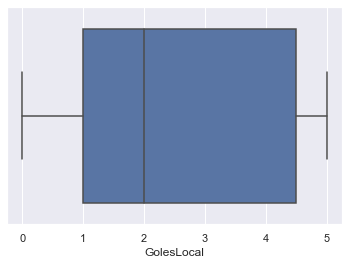

In [26]:
sns.boxplot(x=BarsaTot_8['GolesLocal'])
plt.show()

In [27]:
BarsaTot_8['GolesVisitante'].describe()

count    19.000000
mean      1.789474
std       1.512134
min       0.000000
25%       0.500000
50%       2.000000
75%       2.500000
max       5.000000
Name: GolesVisitante, dtype: float64

In [28]:
BarsaTot_8['GolesVisitante'].sum()

34.0

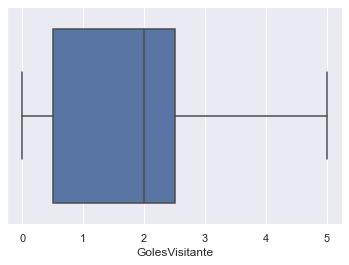

In [29]:
sns.boxplot(x=BarsaTot_8['GolesVisitante'])
plt.show()

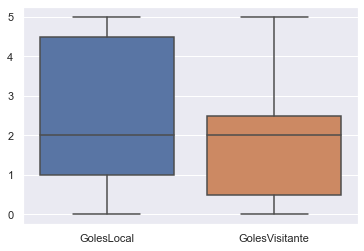

In [30]:
sns.boxplot(data=BarsaTot_8.loc[:, ['GolesLocal', 'GolesVisitante']])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


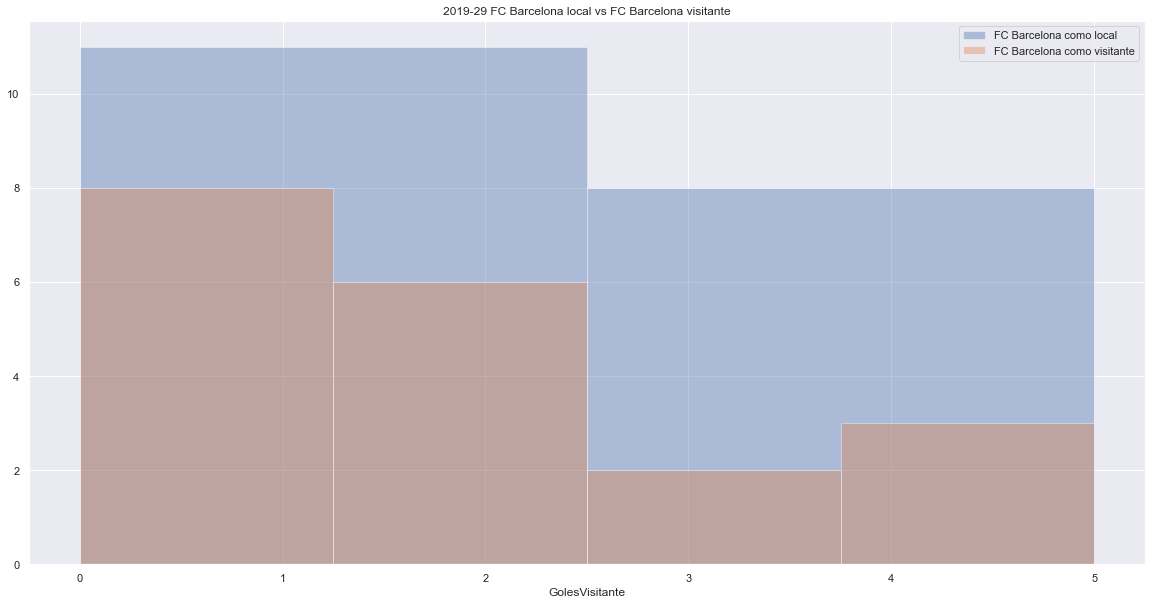

In [31]:
plt.figure(figsize = (20,10))
sns.distplot(BarsaTot_8['GolesLocal'],kde=False, label='FC Barcelona como local')
sns.distplot(BarsaTot_8['GolesVisitante'],kde=False, label='FC Barcelona como visitante')
plt.title("2019-29 FC Barcelona local vs FC Barcelona visitante")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2019-20 FC Barcelona local vs FC Barcelona visitante')

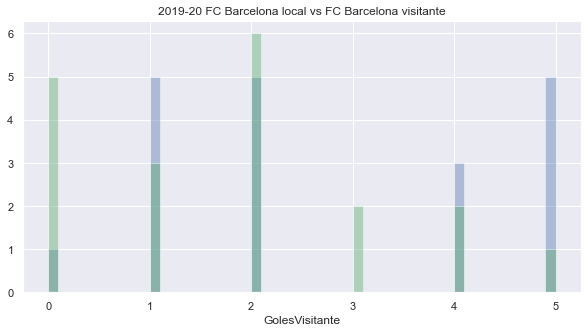

In [32]:
plt.figure(figsize=(10,5))
sns.distplot(BarsaTot_8['GolesLocal'],
             kde=False,
             color='b',
             bins=50);
sns.distplot(BarsaTot_8['GolesVisitante'],
             kde=False,
             color='g',
             bins=50);
plt.title("2019-20 FC Barcelona local vs FC Barcelona visitante")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


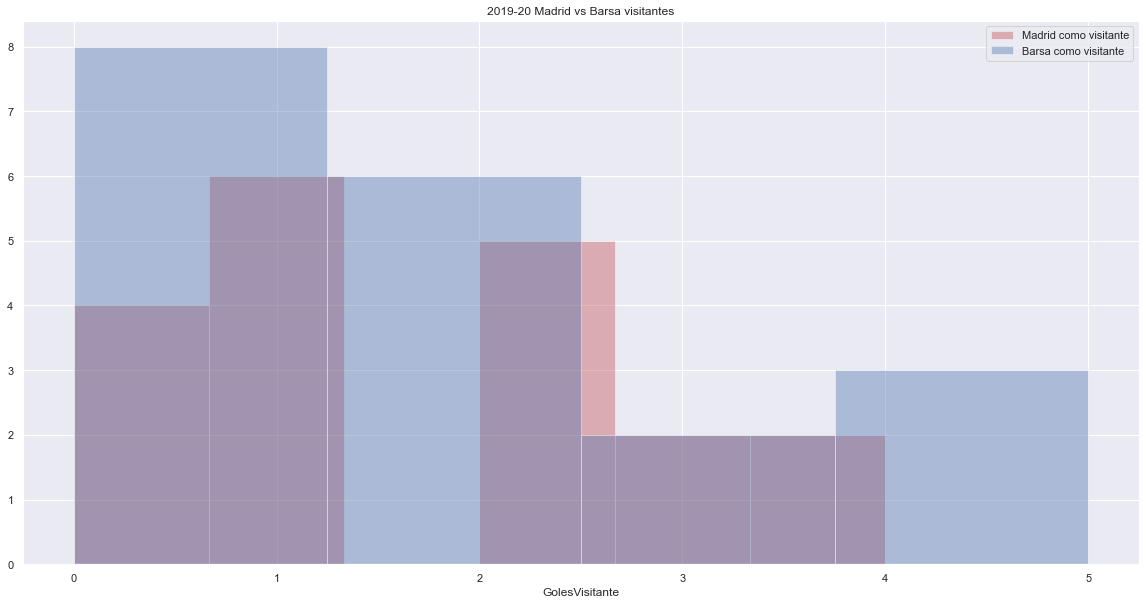

In [33]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_8['GolesVisitante'],kde=False,color='r', label='Madrid como visitante')
sns.distplot(BarsaTot_8['GolesVisitante'],kde=False,color='b', label='Barsa como visitante')
plt.title("2019-20 Madrid vs Barsa visitantes")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


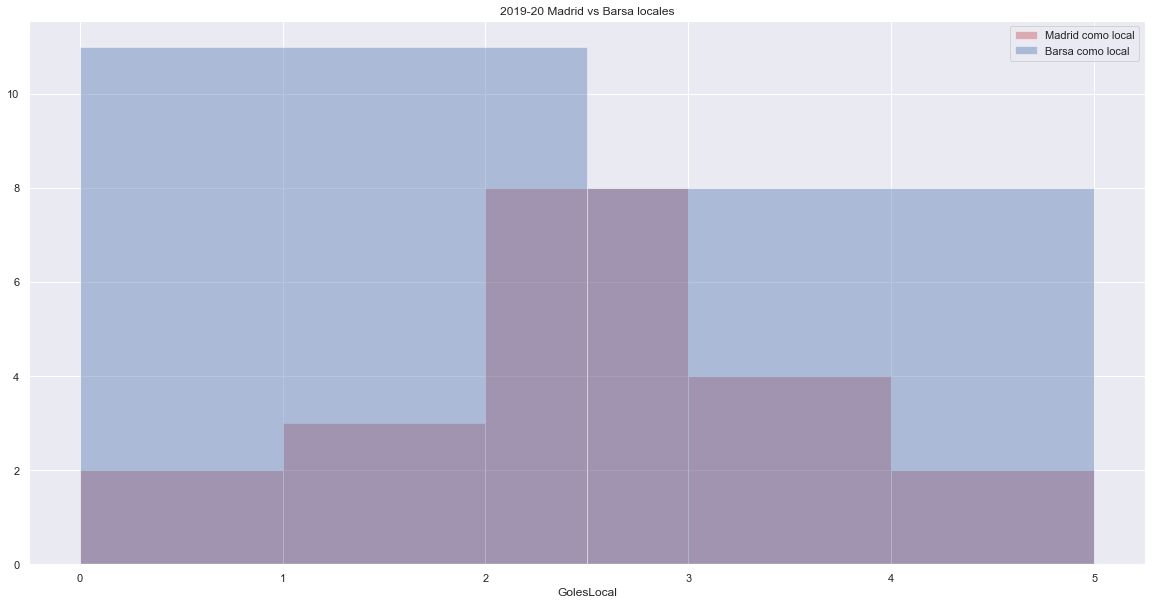

In [34]:
plt.figure(figsize = (20,10))
sns.distplot(Madrid_Tot_8['GolesLocal'],kde=False,color='r', label='Madrid como local')
sns.distplot(BarsaTot_8['GolesLocal'],kde=False,color='b', label='Barsa como local')
plt.title("2019-20 Madrid vs Barsa locales")
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2019-20 Partidos x número de goles')

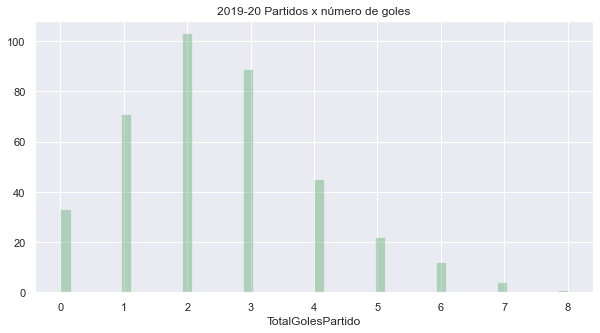

In [35]:
plt.figure(figsize=(10,5))
sns.distplot(df_laliga_2019y20['TotalGolesPartido'],
             kde=False,
             color='g',
             bins=50);
plt.title("2019-20 Partidos x número de goles")

Text(0.5, 1.0, '2019-20 Equipos de LaLiga goles como Locales')

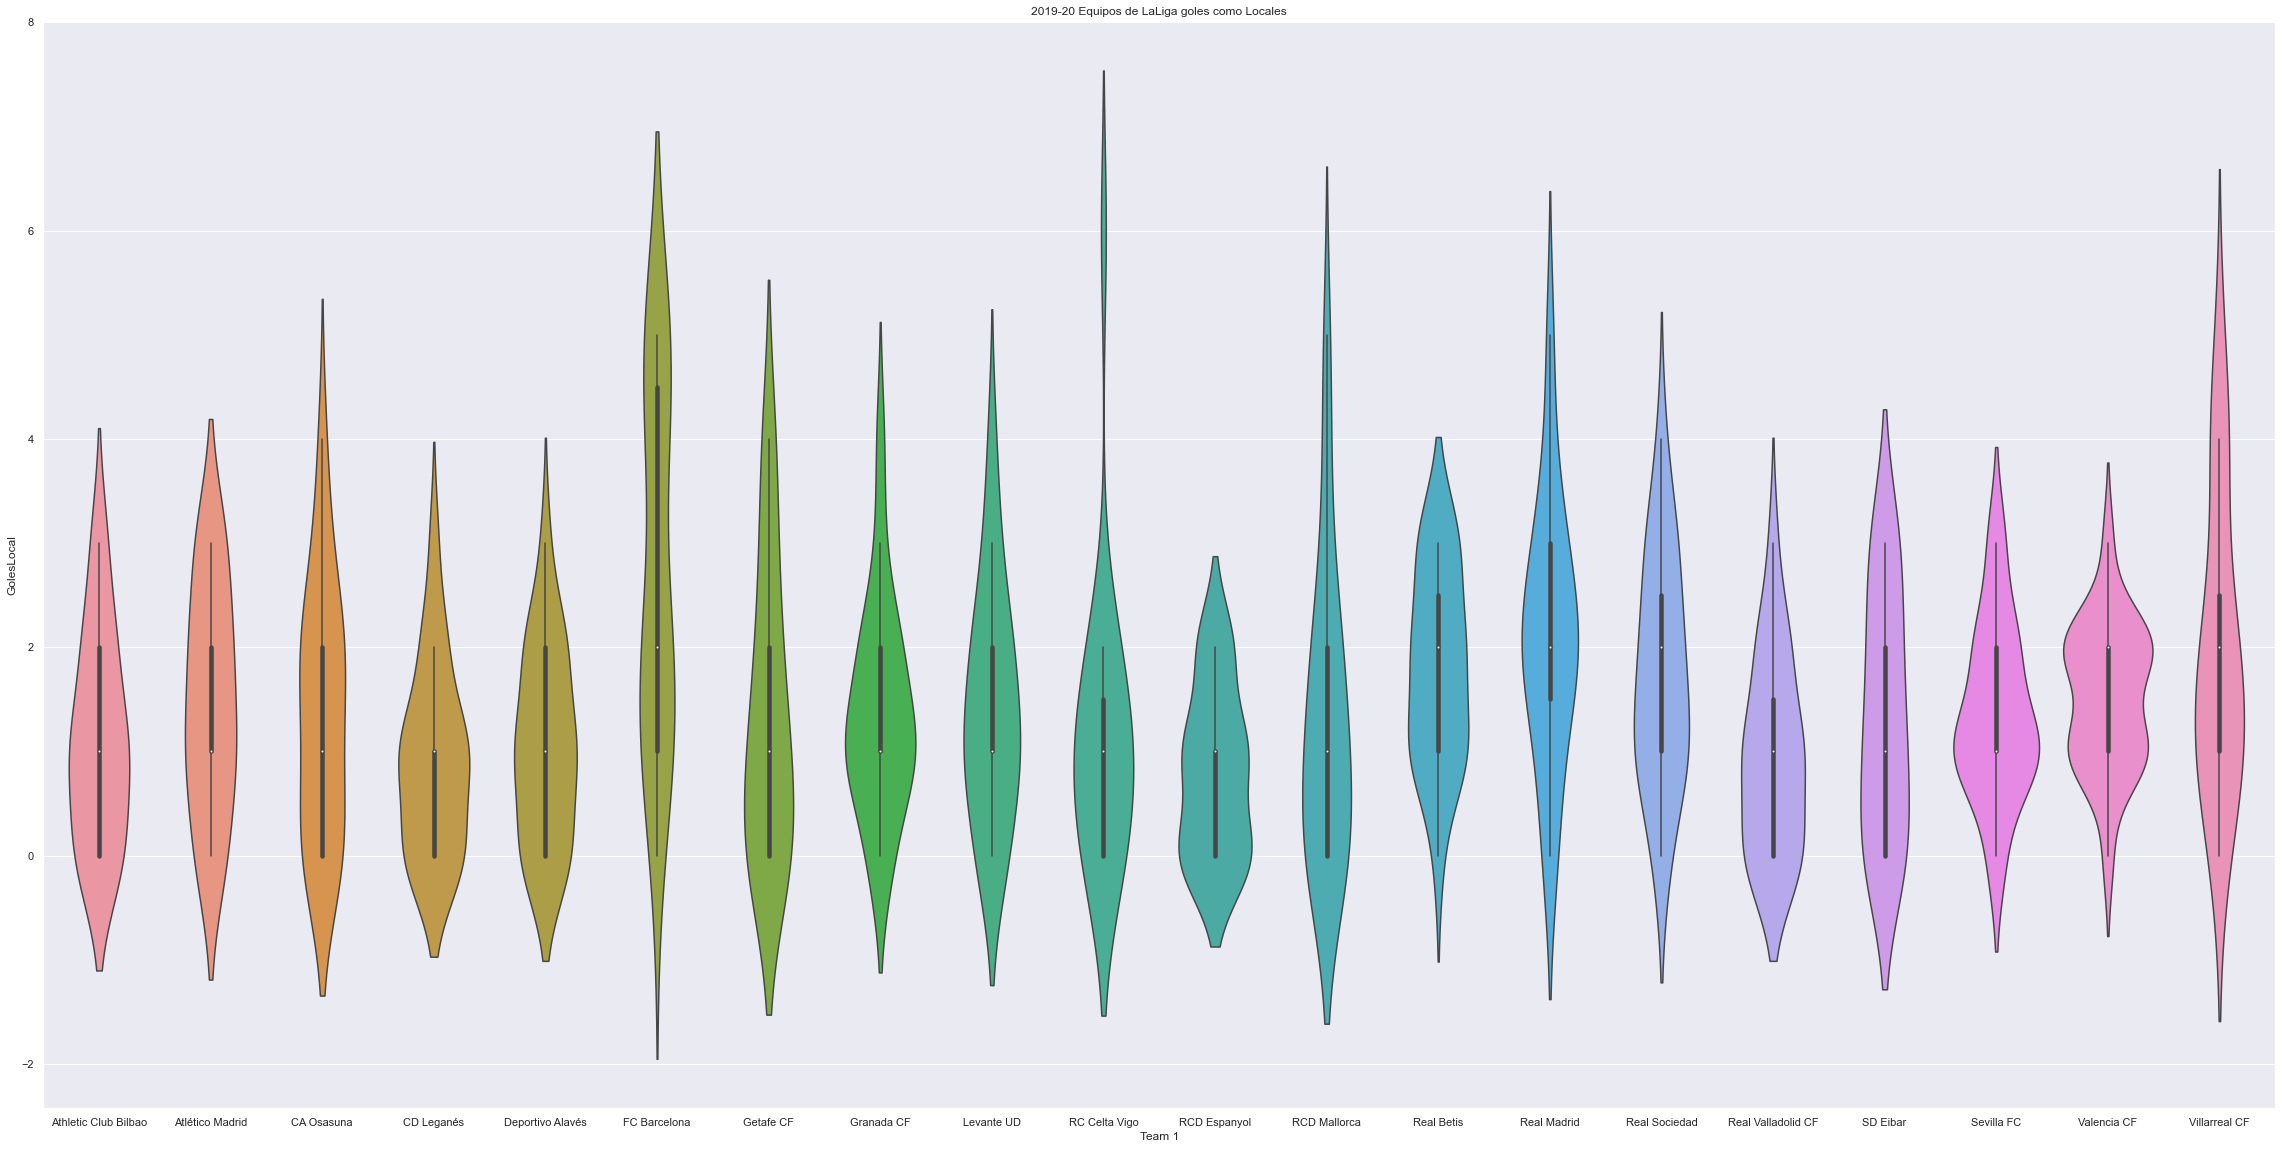

In [36]:
plt.figure(figsize=(40,20))
sns.violinplot(x=df_laliga_2019y20['Team 1'].sort_values(), y=df_laliga_2019y20['GolesLocal'])
plt.title("2019-20 Equipos de LaLiga goles como Locales")

Text(0.5, 1.0, '2019-20 Equipos de LaLiga goles como Visitantes')

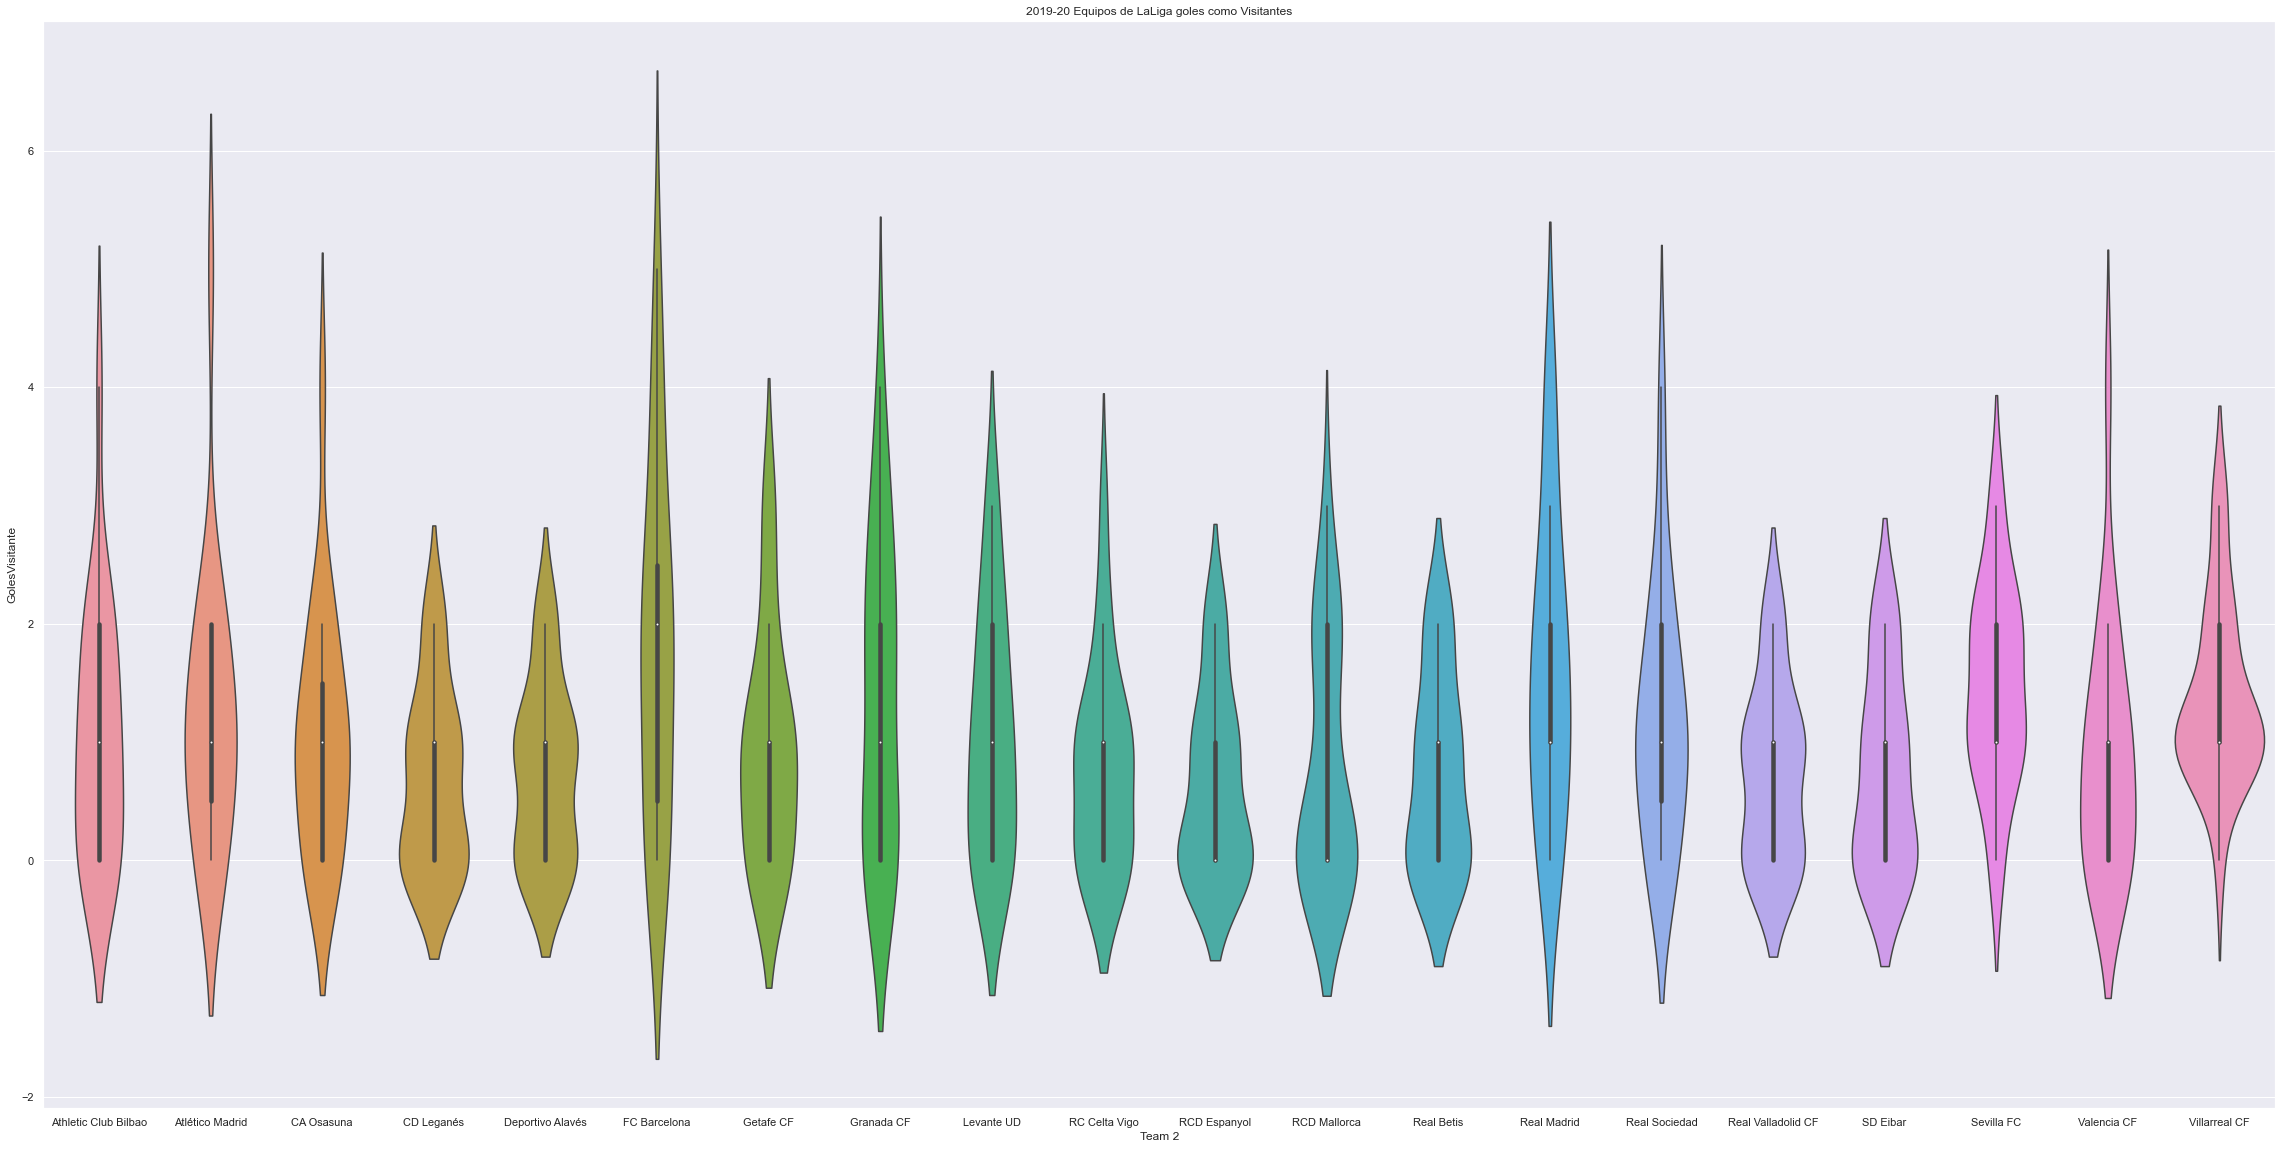

In [37]:
plt.figure(figsize=(40,20))
sns.violinplot(x=df_laliga_2019y20['Team 2'].sort_values(), y=df_laliga_2019y20['GolesVisitante'])
plt.title("2019-20 Equipos de LaLiga goles como Visitantes")

Ganador del campeonato: Real Madrid CF

In [38]:
Madrid_Tot_8['GolesTotales'].sum()

70.0

In [40]:
BarsaTot_8['GolesTotales'].sum()

86.0